In [21]:
from cluster_pockets import *
import numpy as np
import matplotlib.pyplot as plt
as_list = load_as_pickle('/Users/haotian/Dropbox/pycharm_project/DTM/2P2I/bclxl/holo1/md1.pickle')
print(len(as_list))

80


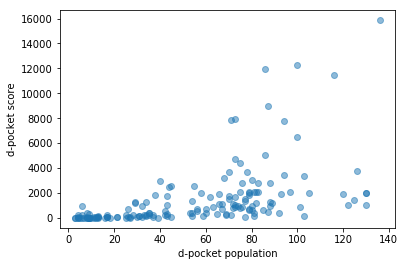

In [22]:
clustered_pockets = cluster_pocket(as_list)
refined_dpocket_list = []
for dpockets in clustered_pockets:
    dp = dpockets[0]
    for i in dpockets[1:]:
        dp.merge(i)
    if len(dp) > 2:
        refined_dpocket_list.append(dp)
refined_dpocket_list.sort(key=lambda _: len(_), reverse=True)
plt.scatter([len(pi) for pi in refined_dpocket_list], [np.sum(pj.get_scores()) for pj in refined_dpocket_list], alpha=0.5)
plt.xlabel('d-pocket population')
plt.ylabel('d-pocket score')
plt.show()

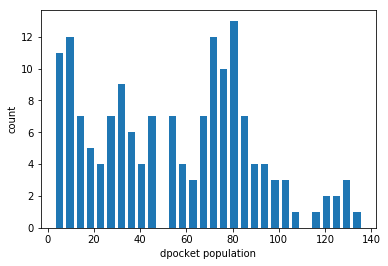

In [23]:
hist, bins = np.histogram([len(p) for p in refined_dpocket_list], bins=30)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.xlabel('dpocket population')
plt.ylabel('count')
plt.show()